In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

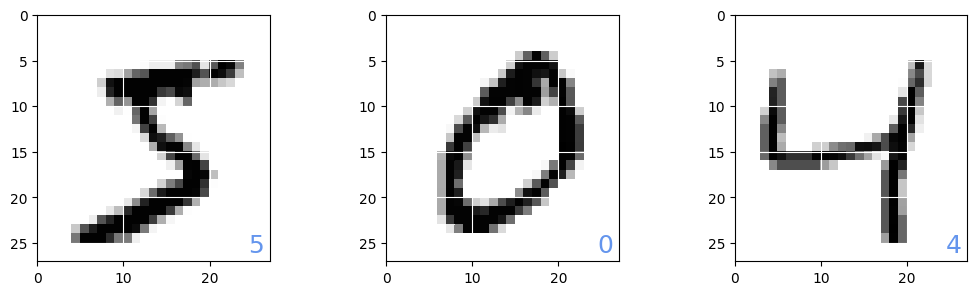

In [ ]:
# week13_1
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)

    plt.grid('on', color='white')
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
y_train = to_categorical(y_train, num_classes)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes)

In [ ]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.random.seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import time

start_time = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test,y_test))

print("computaion time : {:3f}sec".format(time.time() - start_time))

Epoch 1/10


60/60 [==============================] - 0s 3ms/step - loss: 2.0645 - accuracy: 0.3625 - val_loss: 1.7853 - val_accuracy: 0.5578
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 1.6071 - accuracy: 0.6429 - val_loss: 1.4199 - val_accuracy: 0.7369
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 1.3001 - accuracy: 0.7626 - val_loss: 1.1622 - val_accuracy: 0.8040
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 1.0800 - accuracy: 0.8135 - val_loss: 0.9745 - val_accuracy: 0.8397
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.9163 - accuracy: 0.8421 - val_loss: 0.8337 - val_accuracy: 0.8615
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.7927 - accuracy: 0.8604 - val_loss: 0.7278 - val_accuracy: 0.8741
Epoch 7/10
60/60 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.8709 - val_loss: 0.6479 - val_accuracy: 0.8824
Epoch 8/10
60/60 [=============

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss", score[0])
print("Test accuracy:", score[1])

Test loss 0.49908915162086487
Test accuracy: 0.8960000276565552


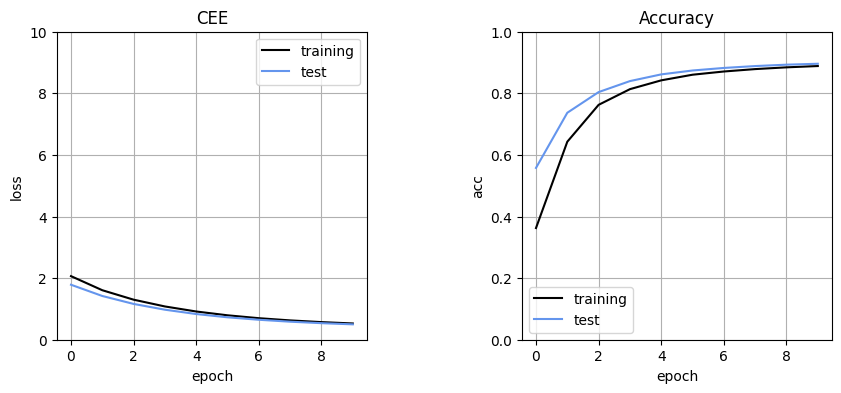

In [ ]:
# week13_2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize = (10, 4))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'training', color = 'black')
plt.plot(history.history['val_loss'], label = 'test', color ='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('CEE')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'training', color = 'black')
plt.plot(history.history['val_accuracy'], label = 'test', color = 'cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Accuracy')
plt.show()

313/313 [==============================] - 0s 458us/step
Total wrong answer:  9 / 96


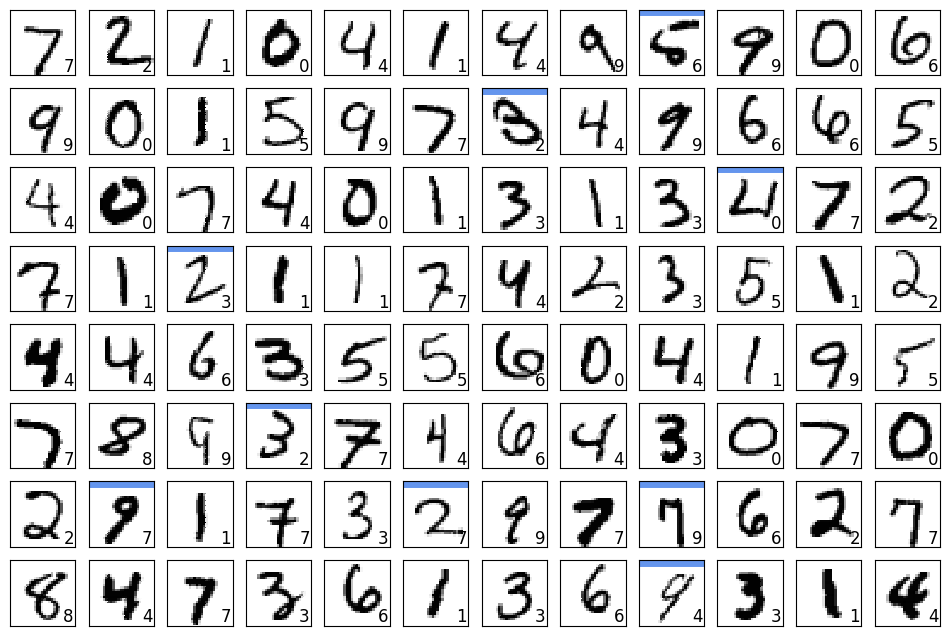

In [ ]:
# week13_3
# 실제 테스트 데이터를 입력했을 대 모델의 출력
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y 를 얻을 수 있다.
    plt.figure(2, figsize = (12, 8))
    plt.gray()
    wrong_answer = 0
    # 그중 처음 96개 분량을 이미지로 출력, 파란색 가로줄은 오인식일 경우를 나타낸다.
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :] # i 번째 출력 레이블을 가져온다
        prediction = np.argmax(wk)  # wk 에서 값이 가장 큰 요소의 인덱스 값을 가져온다 = 정답 레이블의 번호 0 ~ 9 중 하나
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)

        if prediction != np.argmax(y_test[i, :]): # 예측 결과(prediction) 과 y_test가 일치하지 않은 경우 상단에 파란색 줄을 긋는다.
            plt.plot([0, 27], [1, 1], color ='cornflowerblue', linewidth = 5)
            wrong_answer = wrong_answer + 1

        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    print("Total wrong answer: {0: d} / 96" .format(wrong_answer))

# 메인
show_prediction()
plt.show()

In [ ]:
model_relu = Sequential()
model_relu.add(Dense(16, input_dim=784, activation='relu'))
model_relu.add(Dense(10, activation='softmax'))

model_relu.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

start_time = time.time()
history = model_relu.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))

print("computation time: {:.3f}sec".format(time.time() - start_time))

Epoch 1/10
60/60 [==============================] - 0s 2ms/step - loss: 1.5129 - accuracy: 0.5344 - val_loss: 0.8573 - val_accuracy: 0.8070
Epoch 2/10
60/60 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.8432 - val_loss: 0.4968 - val_accuracy: 0.8789
Epoch 3/10
60/60 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.8829 - val_loss: 0.3942 - val_accuracy: 0.8987
Epoch 4/10
60/60 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8985 - val_loss: 0.3437 - val_accuracy: 0.9088
Epoch 5/10
60/60 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.9071 - val_loss: 0.3164 - val_accuracy: 0.9152
Epoch 6/10
60/60 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.9132 - val_loss: 0.2970 - val_accuracy: 0.9187
Epoch 7/10
60/60 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.9176 - val_loss: 0.2837 - val_accuracy: 0.9222
Epoch 8/10
60/60 [==

In [ ]:
score = model_relu.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2564212381839752
Test accuracy: 0.9282000064849854


313/313 [==============================] - 0s 232us/step
Total wrong answer:  7 / 96


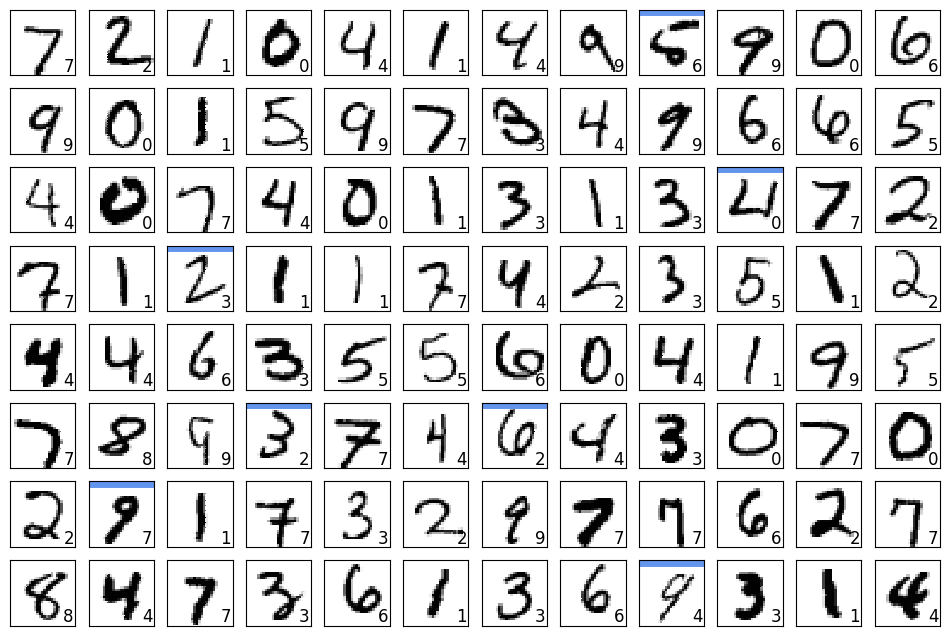

In [ ]:
# week13_4
# 실제 테스트 데이터를 입력했을 때 모델의 출력
def show_prediction():
    n_show = 96
    y = model_relu.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y 를 얻을 수 있다.
    plt.figure(2, figsize = (12, 8))
    plt.gray()
    wrong_answer = 0
    # 그중 처음 96개 분량을 이미지로 출력, 파란색 가로줄은 오인식일 경우를 나타낸다.
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :] # i 번째 출력 레이블을 가져온다
        prediction = np.argmax(wk)  # wk 에서 값이 가장 큰 요소의 인덱스 값을 가져온다 = 정답 레이블의 번호 0 ~ 9 중 하나
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)

        if prediction != np.argmax(y_test[i, :]): # 예측 결과(prediction) 과 y_test가 일치하지 않은 경우 상단에 파란색 줄을 긋는다.
            plt.plot([0, 27], [1, 1], color ='cornflowerblue', linewidth = 5)
            wrong_answer = wrong_answer + 1

        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    print("Total wrong answer: {0: d} / 96" .format(wrong_answer))

# 메인
show_prediction()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype('float32')
x_test = x_test / 255

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

np.random.seed(1)

model_cnn = Sequential()
model_cnn.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                62730     
                                                                 
Total params: 62810 (245.35 KB)
Trainable params: 62810 (245.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import time

start_time = time.time()

history = model_cnn.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))

print("computation time:{:.3f} sec".format(time.time() - start_time))

Epoch 1/20
60/60 [==============================] - 1s 18ms/step - loss: 0.8862 - accuracy: 0.7946 - val_loss: 0.3678 - val_accuracy: 0.8996
Epoch 2/20
60/60 [==============================] - 1s 17ms/step - loss: 0.3329 - accuracy: 0.9052 - val_loss: 0.2841 - val_accuracy: 0.9191
Epoch 3/20
60/60 [==============================] - 1s 18ms/step - loss: 0.2730 - accuracy: 0.9222 - val_loss: 0.2414 - val_accuracy: 0.9312
Epoch 4/20
60/60 [==============================] - 1s 18ms/step - loss: 0.2336 - accuracy: 0.9341 - val_loss: 0.2120 - val_accuracy: 0.9412
Epoch 5/20
60/60 [==============================] - 1s 18ms/step - loss: 0.2007 - accuracy: 0.9437 - val_loss: 0.1865 - val_accuracy: 0.9456
Epoch 6/20
60/60 [==============================] - 1s 17ms/step - loss: 0.1738 - accuracy: 0.9510 - val_loss: 0.1631 - val_accuracy: 0.9565
Epoch 7/20
60/60 [==============================] - 1s 18ms/step - loss: 0.1504 - accuracy: 0.9584 - val_loss: 0.1434 - val_accuracy: 0.9586
Epoch 8/20
60

In [ ]:
score = model_cnn.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06837014853954315
Test accuracy: 0.9782999753952026


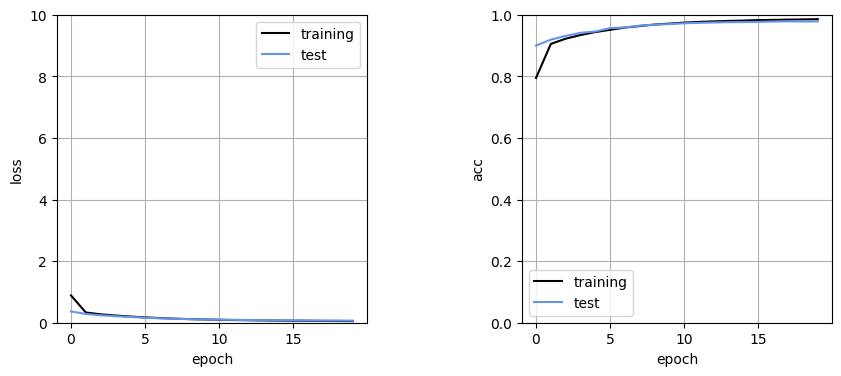

In [ ]:
# week13_5
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize = (10, 4))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'training', color = 'black')
plt.plot(history.history['val_loss'], label = 'test', color ='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'training', color = 'black')
plt.plot(history.history['val_accuracy'], label = 'test', color = 'cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

313/313 [==============================] - 0s 478us/step
Total wrong answer:  2 / 96


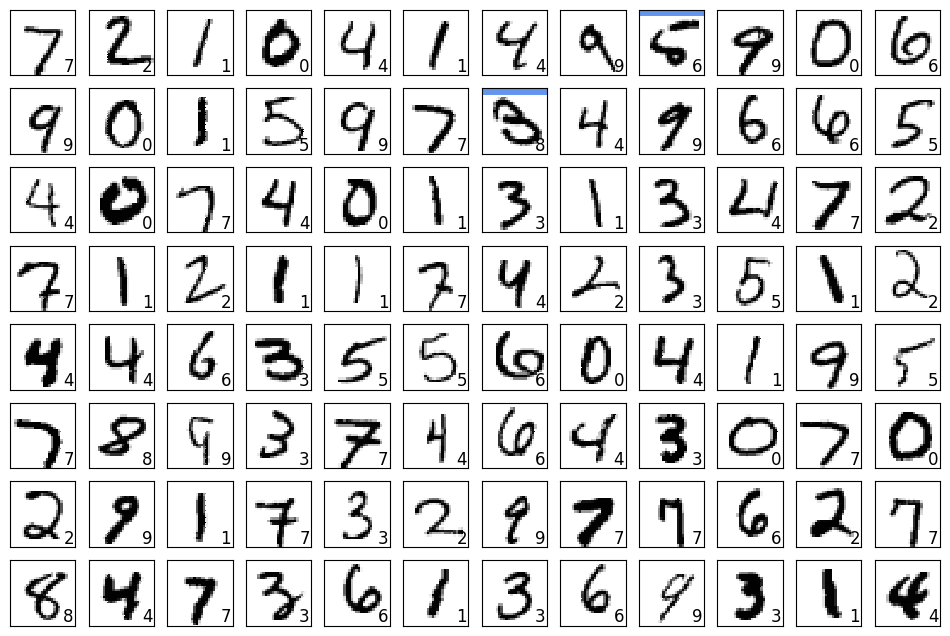

In [ ]:
# week13_6
# 실제 테스트 데이터를 입력했을 ㄸㅐ 모델의 출력
def show_prediction():
    n_show = 96
    y = model_cnn.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y 를 얻을 수 있다.
    plt.figure(2, figsize = (12, 8))
    plt.gray()
    wrong_answer = 0
    # 그중 처음 96개 분량을 이미지로 출력, 파란색 가로줄은 오인식일 경우를 나타낸다.
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :] # i 번째 출력 레이블을 가져온다
        prediction = np.argmax(wk)  # wk 에서 값이 가장 큰 요소의 인덱스 값을 가져온다 = 정답 레이블의 번호 0 ~ 9 중 하나
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)

        if prediction != np.argmax(y_test[i, :]): # 예측 결과(prediction) 과 y_test가 일치하지 않은 경우 상단에 파란색 줄을 긋는다.
            plt.plot([0, 27], [1, 1], color ='cornflowerblue', linewidth = 5)
            wrong_answer = wrong_answer + 1

        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    print("Total wrong answer: {0: d} / 96" .format(wrong_answer))

# 메인
show_prediction()
plt.show()

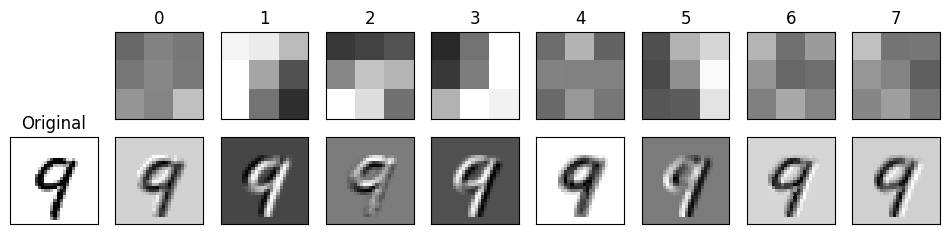

In [ ]:
# week13_7
# 필터 리스트
plt.figure(1, figsize = (12, 2.5))
plt.gray()
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, : , : , 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

# layers[0] 번째 레이어의 매개변수를 갖고오는 메서드
# get_weights()[0] 은 가중치 매개변수(conv 에서는 커널의 weight)
# get_weights()[1] 은 바이어스의 매개변수를 갖고온다
w = model_cnn.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)

for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i] # 0 ~ 7(총 여덟개) 의 필터를 순차적으로 가져온다. w.shape : (3, 3, 1, 8)
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin = min_w, vmax = max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)

    # 필터 처리
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)

    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih : ih + 3, iw: iw +3]
            out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))

    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")

plt.show()
# 9의 이미지에 각각의 필터를 적용한 이미지
# 작은 값은 흰색, 큰 값은 검은색 으로 나타남
# 2번 필터는 가로줄 아래쪽 엣지를 강조
# 7번 필터는 가로 윗쪽 엣지를 강조

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

np.random.seed(1)

model_cnn_2 = Sequential()
model_cnn_2.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model_cnn_2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_cnn_2.add(MaxPooling2D(pool_size=(2,2)))
model_cnn_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cnn_2.add(MaxPooling2D(pool_size=(2,2)))
model_cnn_2.add(Dropout(0.25))
model_cnn_2.add(Flatten())
model_cnn_2.add(Dense(128, activation='relu'))
model_cnn_2.add(Dropout(0.25))
model_cnn_2.add(Dense(num_classes, activation='softmax'))

model_cnn_2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
model_cnn_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)         

In [ ]:
import time

start_time = time.time()

history = model_cnn_2.fit(x_train, y_train, batch_size=1000, epochs=30, verbose=1, validation_data=(x_test, y_test))

print('computation time:{:.3f}'.format(time.time() - start_time))

Epoch 1/30
60/60 [==============================] - 12s 201ms/step - loss: 0.6941 - accuracy: 0.7887 - val_loss: 0.1487 - val_accuracy: 0.9544
Epoch 2/30
60/60 [==============================] - 12s 203ms/step - loss: 0.1436 - accuracy: 0.9553 - val_loss: 0.0673 - val_accuracy: 0.9791
Epoch 3/30
60/60 [==============================] - 12s 196ms/step - loss: 0.0896 - accuracy: 0.9729 - val_loss: 0.0466 - val_accuracy: 0.9847
Epoch 4/30
60/60 [==============================] - 12s 198ms/step - loss: 0.0709 - accuracy: 0.9790 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 5/30
60/60 [==============================] - 12s 195ms/step - loss: 0.0575 - accuracy: 0.9821 - val_loss: 0.0321 - val_accuracy: 0.9891
Epoch 6/30
60/60 [==============================] - 12s 196ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0294 - val_accuracy: 0.9898
Epoch 7/30
60/60 [==============================] - 12s 197ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0276 - val_accuracy: 0.9900

In [ ]:
score = model_cnn_2.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.020016826689243317
Test accuracy 0.9937000274658203


313/313 [==============================] - 1s 2ms/step
Total wrong answer:  1 / 96


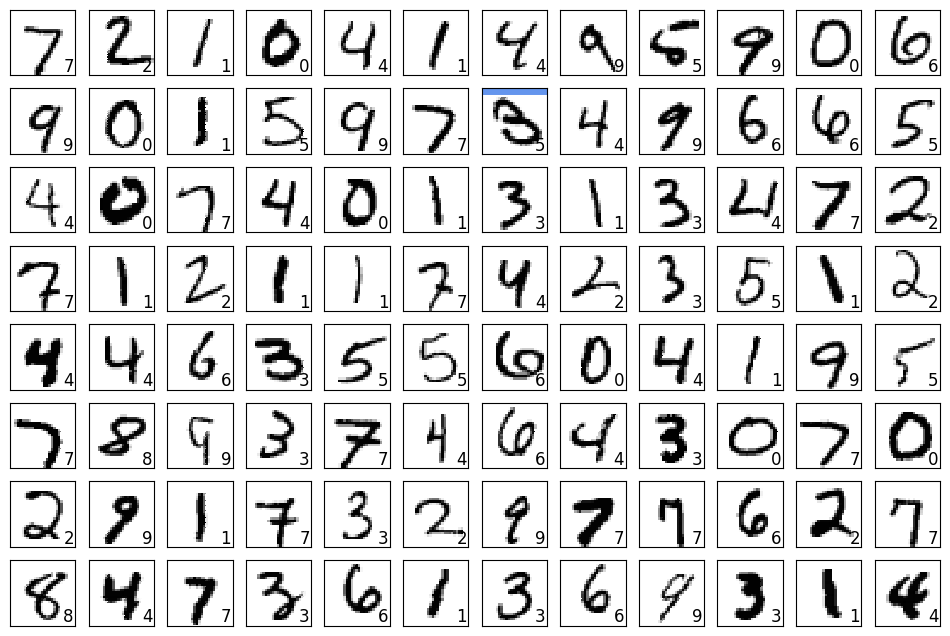

In [ ]:
# week13_8
# 실제 테스트 데이터를 입력했을 때 모델의 출력
def show_prediction():
    n_show = 96
    y = model_cnn_2.predict(x_test) # (A) x_test 전체에 대한 모델의 출력 y 를 얻을 수 있다.
    plt.figure(2, figsize = (12, 8))
    plt.gray()
    wrong_answer = 0
    # 그중 처음 96개 분량을 이미지로 출력, 파란색 가로줄은 오인식일 경우를 나타낸다.
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :] # i 번째 출력 레이블을 가져온다
        prediction = np.argmax(wk)  # wk 에서 값이 가장 큰 요소의 인덱스 값을 가져온다 = 정답 레이블의 번호 0 ~ 9 중 하나
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)

        if prediction != np.argmax(y_test[i, :]): # 예측 결과(prediction) 과 y_test가 일치하지 않은 경우 상단에 파란색 줄을 긋는다.
            plt.plot([0, 27], [1, 1], color ='cornflowerblue', linewidth = 5)
            wrong_answer = wrong_answer + 1

        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
    print("Total wrong answer: {0: d} / 96" .format(wrong_answer))

# 메인
show_prediction()
plt.show()